In [1]:
library(data.table)
library(ggplot2)
library(RColorBrewer)
library(ggsci)
library(magrittr) 
library(ggrepel)
library(dplyr)
library(ggalluvial)
library(ggpubr)

rescale <- function(x, CDS_start,CDS_end) ( (x-CDS_start)/(CDS_end - CDS_start) * 100)
confidence_interval_upper <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean + error
  return(result)
}
confidence_interval_lower <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean - error
  return(result)
}


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:data.table’ からマスクされています: 

     between, first, last 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 




# Figure 1

In [3]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/R")

In [4]:
#load data
load("../data/data_Fig01.RData")

In [5]:
head(out)

,isoform,chrom,start,end,transcript_length,associated_gene,gene_biotype,structural_category_SQANTI3,coding
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>
1,000004f8-97dc-497b-a4aa-1022a682d3af,chr4,75913659,75940260,1824,NAAA,protein_coding,novel_in_catalog,FALSE
2,0002076b-091b-42ce-b6de-0d74a404ea36,chr17,82057881,82065794,1688,DUS1L,protein_coding,novel_in_catalog,TRUE
3,0002b464-6fb4-4e4c-aba7-e27c7c7782a7,chr5,176238423,176345695,1476,SIMC1,protein_coding,novel_in_catalog,TRUE
4,0002c8a5-bf73-48a8-9ba9-fd8bc360872e-1,chr13,30460906,30464247,1192,HMGB1,protein_coding,novel_not_in_catalog,TRUE
5,000311e5-7b24-4a2d-b270-23ddd9f935df,chr14,105851704,106038365,2158,IGHM_IGHV2-5,"IG_V_gene,IG_C_gene,IG_J_gene",fusion,TRUE
6,0003173a-a200-4d9f-80ad-651d95f7be6e,chr19,35748575,35754519,978,LIN37,protein_coding,novel_in_catalog,TRUE


In [6]:
head(gencode)

,isoform,associated_gene,transcript_type,gene_type,transcript_support_level,tag,transcript_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,ENST00000000233.10,ARF5,protein_coding,protein_coding,1,CCDS,1032
2,ENST00000000412.8,M6PR,protein_coding,protein_coding,1,CCDS,2450
3,ENST00000000442.11,ESRRA,protein_coding,protein_coding,1,CCDS,2274
4,ENST00000001008.6,FKBP4,protein_coding,protein_coding,1,CCDS,3715
5,ENST00000001146.7,CYP26B1,protein_coding,protein_coding,1,CCDS,4556
6,ENST00000002125.9,NDUFAF7,protein_coding,protein_coding,1,CCDS,2184


In [7]:
head(phastcons)

,chrom,position,PHASTCONS,start,end,strand,region,scaled_distance
,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
1,chr1,1214834,0,1214127,1215574,-,5UTR,51.14029
2,chr1,1214834,0,1214184,1216722,-,Intron,74.38928
3,chr1,1214834,0,1214184,1215483,-,Intron,49.96151
4,chr1,1214834,0,1214833,1215593,-,3UTR,99.86842
5,chr1,1214835,0,1214127,1215574,-,5UTR,51.07118
6,chr1,1214835,0,1214184,1216722,-,Intron,74.34988


In [8]:
head(lr_suppa)

seqname,gene_id,event_id,alternative_transcripts,total_transcripts
<chr>,<chr>,<chr>,<chr>,<chr>
chr1,ENSG00000227232.5,ENSG00000227232.5;A3:chr1:17742-17915:17368-17915:-,"685f2c26-b4e3-4639-bc6a-138e2d8c864e,6f1e7183-993b-44ae-aaa6-68f9b9a31a05,d6fee0d0-22a3-41c4-b57c-ea5333ac8483","6f1e7183-993b-44ae-aaa6-68f9b9a31a05,d6fee0d0-22a3-41c4-b57c-ea5333ac8483,639d3995-e369-42a5-8282-d05af55a1cd2,685f2c26-b4e3-4639-bc6a-138e2d8c864e"
chr1,ENSG00000279457.4,ENSG00000279457.4;A3:chr1:186549-187129:186469-187129:-,84c6aacf-c5e2-4f8b-b41e-a18dc40f00e1,"84c6aacf-c5e2-4f8b-b41e-a18dc40f00e1,b8c1ad4e-e62a-4710-b42f-7c0dfabb9338"
chr1,ENSG00000228327.3,ENSG00000228327.3;A3:chr1:754327-756077:752668-756077:-,82bf7870-e8c4-4aca-b6d7-b054f602afb6,"82bf7870-e8c4-4aca-b6d7-b054f602afb6,d2d401d1-af5c-4846-aa09-d944a12b98ce"
chr1,ENSG00000230092.7,ENSG00000230092.7;A3:chr1:801322-805799:801160-805799:-,cbe35306-acef-4f5c-8e4c-b0438c3eb9b4,"98de2634-8117-45b1-878e-883065cf3150,cbe35306-acef-4f5c-8e4c-b0438c3eb9b4,62e12587-ca8a-4595-8fca-37c53f08b967"
chr1,ENSG00000230092.7,ENSG00000230092.7;A3:chr1:801322-805799:801163-805799:-,cbe35306-acef-4f5c-8e4c-b0438c3eb9b4,"cccd7837-1bea-4e82-9c02-5bb29f3954e1,cbe35306-acef-4f5c-8e4c-b0438c3eb9b4"
chr1,ENSG00000230092.7,ENSG00000230092.7;A3:chr1:801163-805799:801160-805799:-,cccd7837-1bea-4e82-9c02-5bb29f3954e1,"cccd7837-1bea-4e82-9c02-5bb29f3954e1,98de2634-8117-45b1-878e-883065cf3150,62e12587-ca8a-4595-8fca-37c53f08b967"


In [9]:
head(gen_suppa)

seqname,gene_id,event_id,alternative_transcripts,total_transcripts
<chr>,<chr>,<chr>,<chr>,<chr>
chr1,ENSG00000237491.10,ENSG00000237491.10;A3:chr1:779092-803919:779092-803951:+,"ENST00000655765.1,ENST00000670700.1,ENST00000657896.1,ENST00000658648.1,ENST00000656571.1,ENST00000669749.1,ENST00000666217.1,ENST00000665719.1","ENST00000658648.1,ENST00000665719.1,ENST00000666217.1,ENST00000655765.1,ENST00000412115.2,ENST00000657896.1,ENST00000656571.1,ENST00000669749.1,ENST00000670700.1"
chr1,ENSG00000237491.10,ENSG00000237491.10;A3:chr1:779092-803919:779092-803922:+,"ENST00000655765.1,ENST00000670700.1,ENST00000657896.1,ENST00000658648.1,ENST00000656571.1,ENST00000669749.1,ENST00000666217.1,ENST00000665719.1","ENST00000658648.1,ENST00000665719.1,ENST00000666217.1,ENST00000655765.1,ENST00000657896.1,ENST00000443772.2,ENST00000656571.1,ENST00000669749.1,ENST00000670700.1"
chr1,ENSG00000237491.10,ENSG00000237491.10;A3:chr1:807323-809622:807323-809658:+,"ENST00000412115.2,ENST00000670700.1,ENST00000657896.1,ENST00000658648.1","ENST00000658648.1,ENST00000665719.1,ENST00000412115.2,ENST00000588951.5,ENST00000657896.1,ENST00000656571.1,ENST00000669749.1,ENST00000670700.1"
chr1,ENSG00000237491.10,ENSG00000237491.10;A3:chr1:803667-803919:803667-803951:+,"ENST00000651411.1,ENST00000587530.5","ENST00000586288.1,ENST00000587530.5,ENST00000429505.6,ENST00000651411.1"
chr1,ENSG00000237491.10,ENSG00000237491.10;A3:chr1:779092-803922:779092-803951:+,ENST00000443772.2,"ENST00000412115.2,ENST00000443772.2"
chr1,ENSG00000237491.10,ENSG00000237491.10;A3:chr1:784493-803919:784493-803922:+,"ENST00000591440.5,ENST00000593022.5,ENST00000588951.5","ENST00000593022.5,ENST00000591440.5,ENST00000589531.5,ENST00000588951.5"


In [10]:
head(AS_susceptibility_pathway)

Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Interferon Gamma Response,33/200,4.434890e-11,2.084398e-09,0,0,4.449159,106.06320,SAMD9L;SAMHD1;PSMB10;HLA-DMA;CASP8;CASP1;SLAMF7;ITGB7;UPP1;B2M;IFNAR2;CD74;GCH1;SP110;IL10RA;HLA-B;HLA-A;PSMB8;WARS1;PSMB9;TAPBP;PSMA3;IRF1;PSME1;IRF7;TRIM14;IRF8;IRF5;PTPN6;HLA-DRB1;IRF9;PTPN2;LY6E
Myc Targets V1,32/200,1.979367e-10,4.651512e-09,0,0,4.283342,95.70302,EIF4A1;KARS1;RPLP0;PPM1G;EEF1B2;RPS3;PGK1;MRPL9;HNRNPA1;NOP56;XRCC6;NPM1;PTGES3;CNBP;NAP1L1;ILF2;GNL3;TUFM;PSMA6;COPS5;TFDP1;PSMA1;APEX1;HNRNPD;SRSF2;SRSF3;RNPS1;SNRPA1;PPIA;SRSF7;EIF4G2;RAN
Interferon Alpha Response,19/97,3.444894e-08,5.397001e-07,0,0,5.420156,93.13882,CD74;SAMD9L;SP110;PSMB8;WARS1;PSMB9;PSMA3;ELF1;CASP8;SELL;OAS1;IRF1;PSME1;CASP1;IRF7;TRIM14;B2M;IRF9;LY6E
Allograft Rejection,28/200,5.366100e-08,6.305167e-07,0,0,3.642706,60.98101,ITK;ITGB2;CD3G;IL2RG;PSMB10;HLA-DMA;CCND3;RPS19;B2M;IFNAR2;CD74;CD96;NPM1;FYB1;PRKCB;IL16;RPS3A;HLA-A;WARS1;HLA-E;TAPBP;ZAP70;LCK;IRF7;HLA-DRA;IRF8;KLRD1;PTPN6
Oxidative Phosphorylation,20/200,5.086225e-04,4.781052e-03,0,0,2.461988,18.67124,ATP6V0B;NQO2;NDUFB5;IDH3G;COX4I1;ECH1;IDH2;TCIRG1;ATP5F1C;LDHB;OXA1L;RHOT2;ATP5F1A;ATP5F1B;UQCRC1;IDH3B;NDUFS3;NDUFS2;ACAA1;NDUFV1
DNA Repair,15/150,2.438156e-03,1.909889e-02,0,0,2.453488,14.76145,BCAP31;GMPR2;AAAS;TARBP2;DDB2;POLB;DGUOK;GUK1;ERCC1;POLR1C;NELFCD;VPS28;ITPA;ADA;NELFE


In [11]:
nrow(out) # the total number of isoforms
length(unique(out$associated_gene)) # the total number of genes

[1] 159369

[1] 17496

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     84    1151    1752    1951    2536    9933 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      8     568     929    1666    2142  347561 


	Wilcoxon rank sum test with continuity correction

data:  log(gencode$transcript_length) and log(out$transcript_length)
W = 1.2812e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


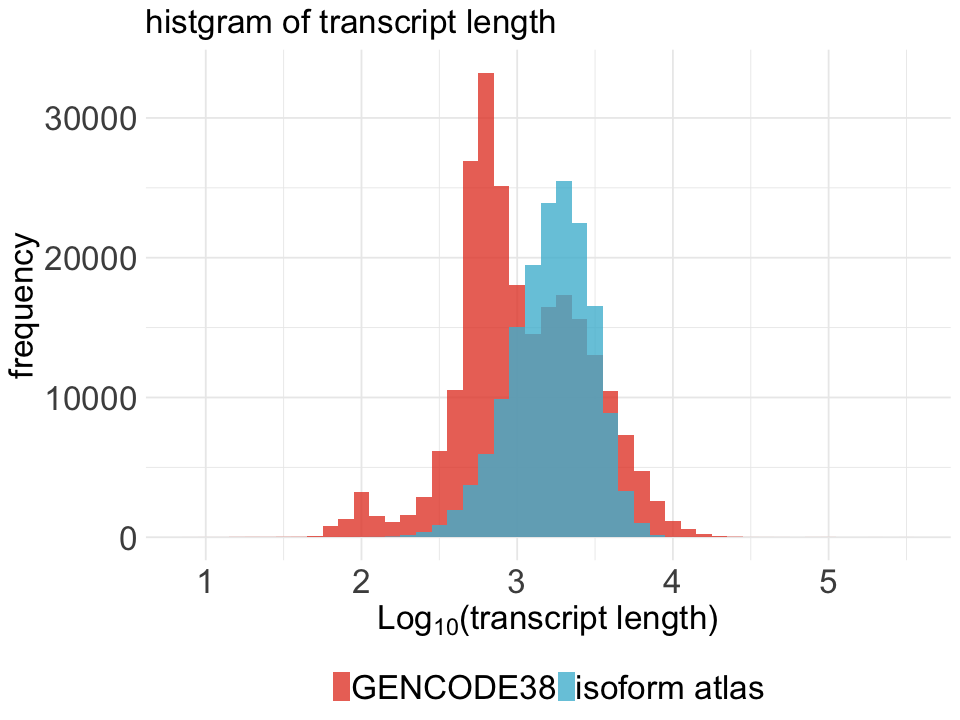

In [12]:
# compare the length of transcripts with those of GENCODE38
summary(out$transcript_length)
summary(gencode$transcript_length)

wilcox.test(log(gencode$transcript_length),log(out$transcript_length))

options(repr.plot.width=8, repr.plot.height=6)
rbind(
  out[,c("isoform","transcript_length","associated_gene")] %>%
    dplyr::mutate(group = "isoform atlas"),
  gencode[,c("isoform","transcript_length","associated_gene")] %>%
    dplyr::mutate(group = "GENCODE38")
) %>% 
  ggplot(., aes(x = log10(transcript_length), fill = group)) + 
  geom_histogram(position = "identity", alpha = 0.8,binwidth = 0.1) + 
  ggtitle("histgram of transcript length") +
  ylab(paste0("frequency")) +
  xlab(expression(paste({Log[10]}, "(transcript length)", sep=""))) +
  theme_minimal() +
  scale_fill_npg() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))




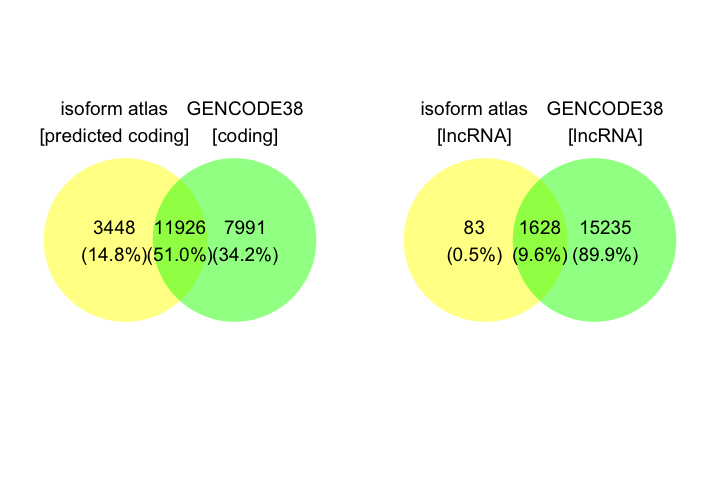

In [13]:
options(repr.plot.width=6, repr.plot.height=4)

# genes overlapped with GENCODE38
x <- list(
  `isoform atlas\n[predicted coding]` = out[out$coding,]$associated_gene,
  `GENCODE38\n[coding]` = gencode[gencode$gene_type=="protein_coding",]$associated_gene
)
g1 = ggvenn::ggvenn(x, 
               show_elements = FALSE, show_percentage = TRUE, 
               digits = 1, fill_color = c("yellow", "green"), 
               fill_alpha = 0.5, stroke_color = "white", stroke_alpha = 0.5, 
               stroke_size = 0, stroke_linetype = "solid", set_name_color = "black", 
               set_name_size = 4, text_color = "black", text_size = 4, label_sep = ",")
x <- list(
  `isoform atlas\n[lncRNA]` = out[out$gene_biotype=="lncRNA",]$associated_gene,
  `GENCODE38\n[lncRNA]` = gencode[gencode$gene_type=="lncRNA",]$associated_gene
)
g2 = ggvenn::ggvenn(x, 
               show_elements = FALSE, show_percentage = TRUE, 
               digits = 1, fill_color = c("yellow", "green"), 
               fill_alpha = 0.5, stroke_color = "white", stroke_alpha = 0.5, 
               stroke_size = 0, stroke_linetype = "solid", set_name_color = "black", 
               set_name_size = 4, text_color = "black", text_size = 4, label_sep = ",") 
ggpubr::ggarrange(g1,g2)


In [14]:
# specific coding-genes in isoform atlas
setdiff(out[out$coding,]$associated_gene,
        gencode[gencode$gene_type=="protein_coding",]$associated_gene)

[1] "IGHM_IGHV2-5"                              
   [2] "STAG3L2"                                   
   [3] "GBAP1"                                     
   [4] "PVT1"                                      
   [5] "LINC02390_CLEC2D"                          
   [6] "RP11-278C7.1_YARS2"                        
   [7] "CA5BP1_CA5B"                               
   [8] "GARS1-DT_AC005154.7"                       
   [9] "ZNF826P"                                   
  [10] "novelGene_4996"                            
  [11] "ZNRD1ASP"                                  
  [12] "LINC00944"                                 
  [13] "C1RL-AS1"                                  
  [14] "ST20_RP11-81A1.12"                         
  [15] "AP000233.4"                                
  [16] "IGKV1-5_IGKC"                              
  [17] "LINC00482"                                 
  [18] "LINC01133"                                 
  [19] "TRBV27_TRBC2"                              
  [20] "CH17-195P21.2"                             
  [21] "novelGene_3305"                            
  [22] "RP11-214K3.25"                             
  [23] "RPL32P18"                                  
  [24] "RP11-47L3.1"                               
  [25] "SFMBT1_RFT1"                               
  [26] "RP5-1111F22.1"                             
  [27] "ZNF731P"                                   
  [28] "CTB-180A7.3_ACER1"                         
  [29] "novelGene_SORCS2_AS"                       
  [30] "IGHM_IGHV3-11"                             
  [31] "novelGene_1019"                            
  [32] "MALAT1"                                    
  [33] "OXNAD1_RP11-415F23.4"                      
  [34] "ZNF236-DT"                                 
  [35] "IGLC3"                                     
  [36] "novelGene_1555"                            
  [37] "GATAD1_AC007566.10"                        
  [38] "XXbac-BPG254B15.11"                        
  [39] "LINC00205"                                 
  [40] "novelGene_RP11-231N9.1_AS"                 
  [41] "TRAV8-3"                                   
  [42] "TRAC"                                      
  [43] "LINC00299"                                 
  [44] "LINC01176_ZNRF2"                           
  [45] "TRAC_TRAV26-1"                             
  [46] "MTG1_SCART1"                               
  [47] "novelGene_6045"                            
  [48] "STAG3L4"                                   
  [49] "RP11-11C20.3_PCMTD1"                       
  [50] "WAKMAR2"                                   
  [51] "TRBV28"                                    
  [52] "PRR13P2"                                   
  [53] "SPATA5L1_C15orf48"                         
  [54] "CTD-3092A11.1"                             
  [55] "TRBC1"                                     
  [56] "TRBC1_TRBV21-1"                            
  [57] "IGHD"                                      
  [58] "RELA-DT"                                   
  [59] "TRGV10_TRGC1"                              
  [60] "RP11-452L6.7_AHSP"                         
  [61] "RP11-1149O23.3"                            
  [62] "IGLV2-23_IGLV2-11_IGLC3_IGLV2-14"          
  [63] "RP11-61O1.1"                               
  [64] "RP11-397E7.5"                              
  [65] "CD320_NDUFA7"                              
  [66] "RP11-705C15.2"                             
  [67] "C1orf162_ATP5PB"                           
  [68] "TRGC2"                                     
  [69] "NPM1P7_CLEC2D"                             
  [70] "FAM30A"                                    
  [71] "EIF2S2P3"                                  
  [72] "IGLC2_IGLV3-19"                            
  [73] "RPS3AP26"                                  
  [74] "NKAPP1"                                    
  [75] "LINC01550"                                 
  [76] "STARD7-AS1"                                
  [77] "SIGLEC22P"                                 

In [15]:
# specific lncRNA in isoform atlas
setdiff(out[out$gene_biotype=="lncRNA",]$associated_gene,
        gencode[gencode$gene_type=="lncRNA",]$associated_gene)


[1] NA                                  "RP11-446N19.1_RP11-96H19.1"       
 [3] "MIR646HG_C20orf197"                "AC009473.1_GLCCI1-DT"             
 [5] "RP11-1079K10.3_RP11-1079K10.2"     "RP11-596A13.1_LINC02531"          
 [7] "RP11-603J24.5_RP11-603J24.6"       "RP11-49I4.5_LINC02085"            
 [9] "PRKCQ-AS1_LINC02648"               "novelGene_4818"                   
[11] "RP1-153P14.5_LINC02520"            "DLGAP1-AS2_DLGAP1-AS1"            
[13] "CTD-2012K14.8_CTD-2012K14.6"       "LINC00402_RP11-512C24.4"          
[15] "RP11-589P10.5_ALOX12-AS1"          "LINC00402_RP11-285E18.2"          
[17] "RP11-326G21.1_CH17-189H20.1"       "EIF1B-AS1_ENTPD3-AS1"             
[19] "MIOS-DT_RP5-1159O4.2"              "RP4-564F22.5_SNHG17"              
[21] "RP11-454H13.8_ZBTB11-AS1"          "AC006460.2_AC005540.3"            
[23] "RP11-10O17.3_UBL7-AS1"             "AC106053.1_RP11-599B8.1"          
[25] "FAM160A1-DT_RP11-731D1.4"          "RP11-406H23.2_RP11-247L20.3"      
[27] "LINC-PINT_AC058791.1"              "LINC01126_AC010883.5"             
[29] "C9orf106_LINC01503"                "RP11-49I4.5_RP11-221J22.2"        
[31] "novelGene_4813"                    "ATXN1-AS1_RP1-151F17.2"           
[33] "LINC02851_RP11-390F4.3"            "C6orf3_TRAF3IP2-AS1"              
[35] "LINC00630_LL0XNC01-237H1.2"        "LINC01281_RP11-265P11.1"          
[37] "CACNA1C-AS2_CACNA1C-AS1"           "POC1B-AS1_RP11-981P6.1"           
[39] "AC104653.1_AC024704.2"             "RP11-5C23.1_PAXIP1-AS2"           
[41] "RP5-1166H10.4_MATN1-AS1"           "RP11-407A16.3_LINC00944"          
[43] "AC024084.1_AC009784.3"             "RP11-305L7.1_RP11-305L7.3"        
[45] "RP11-35G9.3_RP11-35G9.5"           "AC007879.2_AC007879.5"            
[47] "SRI-AS1_AC003991.3"                "LINC02757_RP11-672A2.6"           
[49] "RP11-932O9.8_RP11-932O9.7"         "novelGene_4814"                   
[51] "KB-431C1.5_UBR5-AS1"               "novelGene_5124"                   
[53] "novelGene_4816"                    "FAM30A_AL122127.25"               
[55] "LINC02324_CTD-2509G16.5"           "RP11-345F18.3_RP11-345F18.2"      
[57] "novelGene_RP3-365E2.1_AS"          "RP11-530N7.3_RP11-589P10.7"       
[59] "novelGene_5025"                    "novelGene_ARMC2_AS"               
[61] "AC006369.3_AC006369.2"             "ALOX12-AS1_RP11-530N7.3"          
[63] "RP11-310E22.5_RP11-310E22.4"       "RP1-118J21.27_RP1-118J21.25"      
[65] "RP11-547D23.1_AL163953.3"          "novelGene_4817"                   
[67] "CTD-2035E11.4_CTD-2035E11.3"       "MIATNB_MIAT"                      
[69] "LINC02320_RP11-1029J19.4"          "NFYC-AS1_RP4-739H11.3"            
[71] "RP11-556H2.2_RP11-556H2.3"         "TCL6_RP11-1070N10.5"              
[73] "C1orf220_RP5-1098D14.1"            "LINC00427_LINC00426"              
[75] "LINC00402_RP11-512C24.4_LINC00381" "novelGene_4819"                   
[77] "novelGene_4815"                    "LINC01480_AC006129.1"             
[79] "RP11-548P2.2_ST3GAL5-AS1"          "RP11-567C2.1_RP11-654D12.2"       
[81] "novelGene_CFAP410_AS"              "AC006372.5_AC006372.4"            
[83] "TTN-AS1_RP11-65L3.4"

In [16]:
# The proportion of readthrough or novel genes in coding genes identified only in the isoform atlas
(out %>%
    dplyr::filter(associated_gene %in% setdiff(out[out$coding,]$associated_gene,
                                               gencode[gencode$gene_type=="protein_coding",]$associated_gene)) %>%
    dplyr::filter(grepl("_",associated_gene) | grepl("^novel_",associated_gene)) %>%
    dplyr::distinct(c(associated_gene)) %>%
    nrow())/
  (out %>%
    dplyr::filter(associated_gene %in% setdiff(out[out$coding,]$associated_gene,
                                               gencode[gencode$gene_type=="protein_coding",]$associated_gene)) %>%
    dplyr::distinct(c(associated_gene)) %>%
    nrow())


out %>%
  dplyr::filter(associated_gene %in% setdiff(out[out$coding,]$associated_gene,
                                             gencode[gencode$gene_type=="protein_coding",]$associated_gene)) %>%
  dplyr::select(c(isoform,associated_gene,chrom,start,end)) %>%
  dplyr::arrange(chrom,start) %>%
  write.table(.,"./coding_genes_only_in_isoform_atlas.txt", sep="\t", quote = FALSE, row.names = FALSE)

[1] 0.5493039

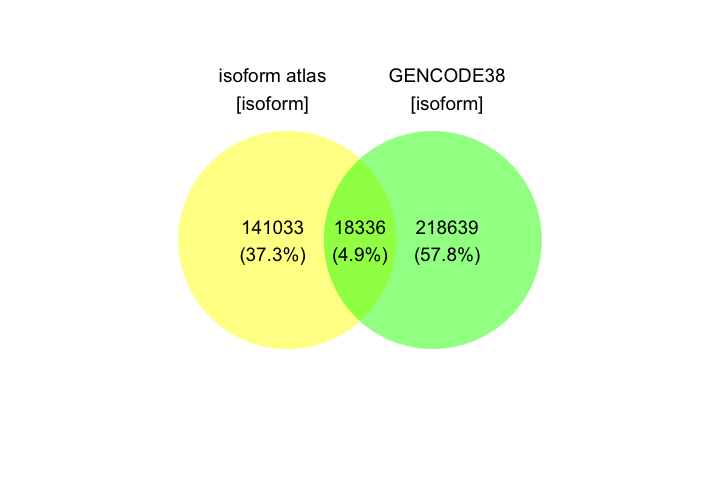

In [17]:
options(repr.plot.width=6, repr.plot.height=4)

## isoform level
## isoforms overlapped with GENCODE38
x <- list(
  `isoform atlas\n[isoform]` = out$isoform,
  `GENCODE38\n[isoform]` = gencode$isoform
)
ggvenn::ggvenn(x, 
               show_elements = FALSE, show_percentage = TRUE, 
               digits = 1, fill_color = c("yellow", "green"), 
               fill_alpha = 0.5, stroke_color = "white", stroke_alpha = 0.5, 
               stroke_size = 0, stroke_linetype = "solid", set_name_color = "black", 
               set_name_size = 4, text_color = "black", text_size = 4, label_sep = ",") 


Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2, df = n - 1):
“ 計算結果が NaN になりました ”
Warning message in qt((interval + 1)/2

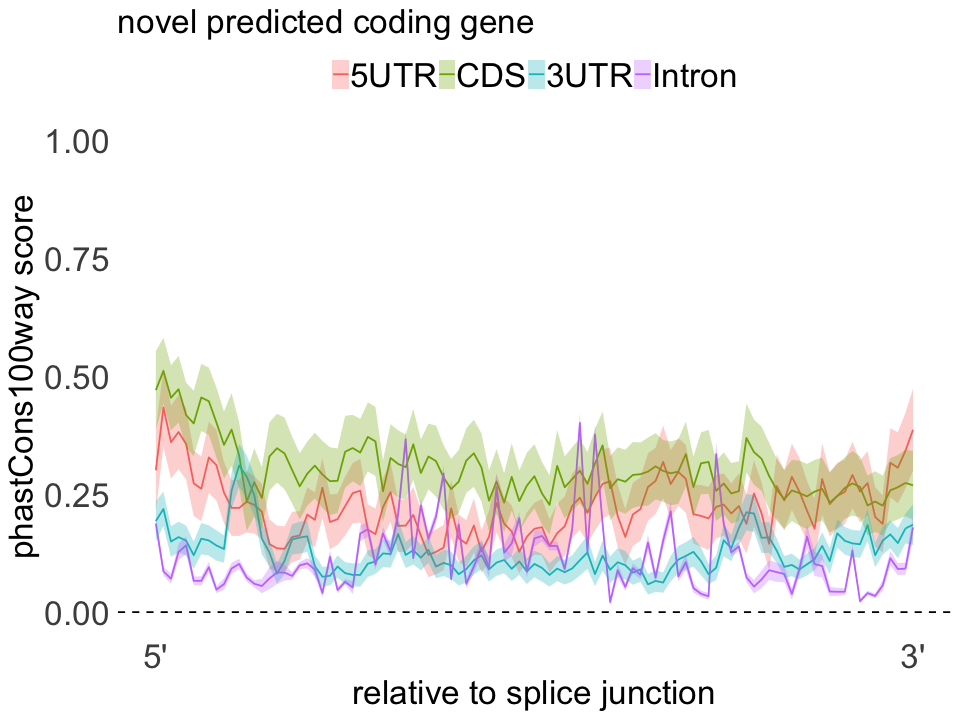

In [18]:
options(repr.plot.width=8, repr.plot.height=6)
phastcons %>%
  dplyr::mutate(scaled_distance_bin = round(scaled_distance) ,
                region = factor(region,levels = c("5UTR","CDS","3UTR","Intron"))) %>%
  dplyr::group_by(scaled_distance_bin,region) %>%
  dplyr::summarize(PHASTCONS_mean = mean(PHASTCONS, na.rm=TRUE),
                   PHASTCONS_CI_up = confidence_interval_upper(PHASTCONS),
                   PHASTCONS_CI_low = confidence_interval_lower(PHASTCONS)
  ) %>%
  as.data.frame() %>%
  na.omit() %>%
  ggplot(., aes(x=scaled_distance_bin,y=PHASTCONS_mean)) + 
  geom_line(aes(x=scaled_distance_bin,y=PHASTCONS_mean,color=region)) +
  geom_ribbon(aes(x=scaled_distance_bin, y=PHASTCONS_mean, ymax = PHASTCONS_CI_up, ymin = PHASTCONS_CI_low,fill=region), 
              alpha=0.3) +
  ggtitle(paste0("novel predicted coding gene")) +
  ylab(paste0("phastCons100way score")) +
  xlab("relative to splice junction") +
  scale_x_continuous(labels=c("5'","3'"), breaks=c(0,100), limits=c(0,100)) +
  geom_hline(yintercept = 0,linetype="dashed",colour="black") +
  ylim(0,1) +
  theme_minimal() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        panel.grid=element_blank(),
        legend.position = "top",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

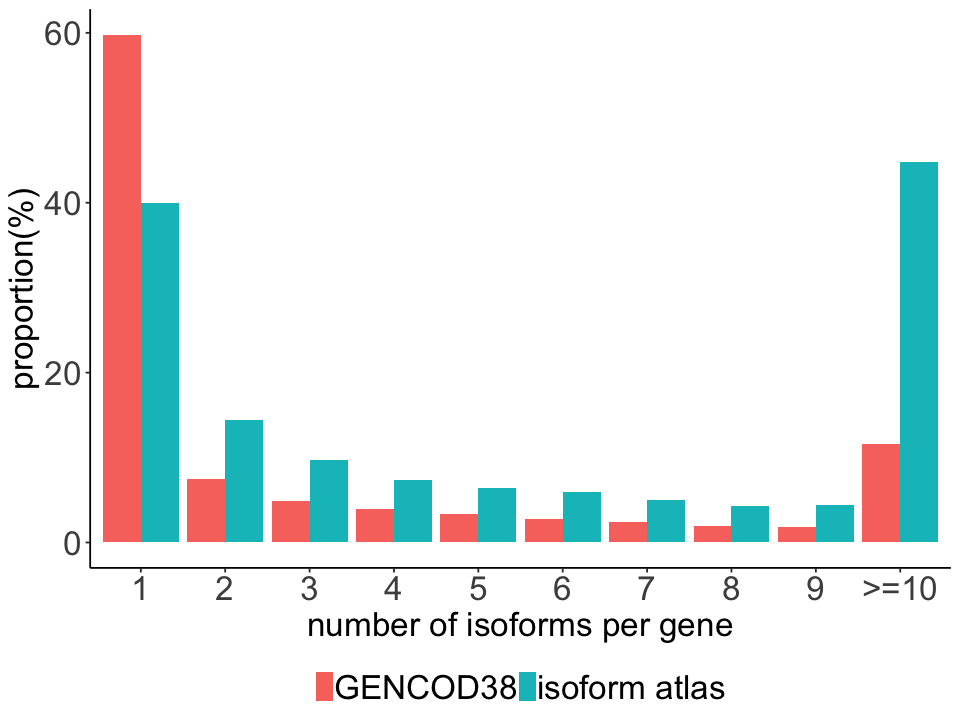

In [19]:
options(repr.plot.width=8, repr.plot.height=6)

# the counts of isoforms per gene

rbind(out %>%
        # dplyr::filter(gene_biotype == "protein_coding") %>%
        dplyr::group_by(associated_gene) %>%
        dplyr::summarise(count = dplyr::n()) %>%
        dplyr::arrange(count) %>%
        as.data.frame() %>%
        dplyr::group_by(count) %>%
        dplyr::summarise(isoform_count = dplyr::n()) %>%
        as.data.frame() %>%
        dplyr::mutate(count = ifelse(count>=10, ">=10", count),
                     count = factor(count,levels = c("1","2","3","4","5","6","7","8","9",">=10"))) %>%
        dplyr::group_by(count) %>%
        dplyr::mutate(isoform_count = sum(isoform_count),
                      proportion = 100*isoform_count/length(unique(out[out$gene_biotype == "protein_coding", ]$associated_gene)),
                      group = "isoform atlas") %>%
        as.data.frame() %>%
        unique(),
      gencode %>%
        # dplyr::filter(transcript_type == "protein_coding") %>%
        dplyr::group_by(associated_gene) %>%
        dplyr::summarise(count = dplyr::n()) %>%
        dplyr::arrange(count) %>%
        as.data.frame() %>%
        dplyr::group_by(count) %>%
        dplyr::summarise(isoform_count = dplyr::n()) %>%
        as.data.frame() %>%
        dplyr::mutate(count = ifelse(count>=10, ">=10", count),
                     count = factor(count,levels = c("1","2","3","4","5","6","7","8","9",">=10"))) %>%
        dplyr::group_by(count) %>%
        dplyr::mutate(isoform_count = sum(isoform_count),
                      proportion = 100*isoform_count/length(unique(gencode %>%
                                                                      .$associated_gene)),
                      group = "GENCOD38") %>%
        as.data.frame() %>%
        unique()
) %>%
  ggplot(., aes(x = count, y = proportion, fill = group)) + 
  geom_bar(position="dodge", stat="identity") +
  xlab(paste0("number of isoforms per gene")) + 
  ylab(paste0("proportion(%)")) +
  theme_classic() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))



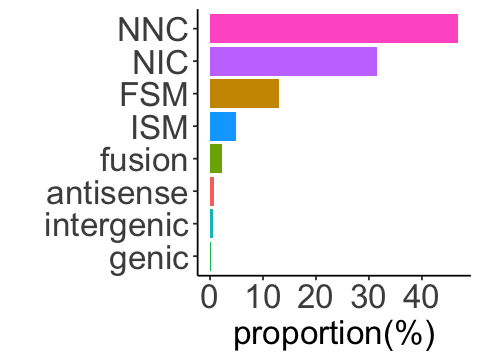

In [20]:
options(repr.plot.width=4, repr.plot.height=3)

# structural category by SQANTI3 in comparison with GENCODE38

out %>%
  dplyr::group_by(structural_category_SQANTI3) %>%
  dplyr::summarise(count = dplyr::n()) %>%
  dplyr::mutate(structural_category_SQANTI3 = case_when(
    structural_category_SQANTI3 == "full-splice_match" ~ "FSM",
    structural_category_SQANTI3 == "incomplete-splice_match" ~ "ISM",
    structural_category_SQANTI3 == "novel_in_catalog" ~ "NIC",
    structural_category_SQANTI3 == "novel_not_in_catalog" ~ "NNC",
    TRUE ~ structural_category_SQANTI3
  )) %>%
  dplyr::mutate(proportion = 100*count/sum(count)) %>%
  dplyr::arrange(proportion) %>%
  as.data.frame() %>%
  ggplot(., aes(x = reorder(structural_category_SQANTI3, proportion), y = proportion, fill = structural_category_SQANTI3)) + 
  geom_bar(position="dodge", stat="identity") +
  xlab(paste0("")) + 
  ylab(paste0("proportion(%)")) +
  coord_flip() +
  theme_classic() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))




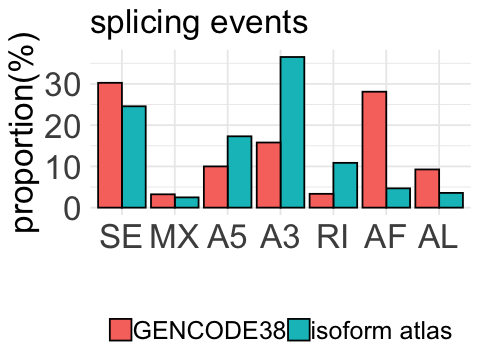

In [21]:
options(repr.plot.width=4, repr.plot.height=3)

# splicing events by SUPPA2
rbind(
  lr_suppa %>%
    # dplyr::filter(alternative_transcripts %in% squanti[squanti$min_cov>0,]$isoform) %>%  # min_cov: minimum junction coverage based on short read STAR junction output file. NA if no short read given.
    tidyr::separate_rows(.,alternative_transcripts, sep = ",", convert = TRUE) %>%
    dplyr::mutate(event_id = stringr::str_split(event_id,pattern=";",simplify=TRUE) %>% .[,2] %>% stringr::str_split(.,pattern=":",simplify=TRUE) %>% .[,1]) %>%
    dplyr::select(c(event_id,alternative_transcripts)) %>%
    dplyr::group_by(event_id) %>%
    dplyr::summarise(count = n()) %>%
    dplyr::filter(event_id!="") %>%
    dplyr::mutate(proportion = 100*count/sum(count),
                  group = "isoform atlas",
                  event_id = factor(event_id, levels = c("SE","MX","A5","A3","RI","AF","AL"))),
  gen_suppa %>%
    tidyr::separate_rows(.,alternative_transcripts, sep = ",", convert = TRUE) %>%
    dplyr::mutate(event_id = stringr::str_split(event_id,pattern=";",simplify=TRUE) %>% .[,2] %>% stringr::str_split(.,pattern=":",simplify=TRUE) %>% .[,1]) %>%
    dplyr::select(c(event_id,alternative_transcripts)) %>%
    dplyr::group_by(event_id) %>%
    dplyr::summarise(count = n()) %>%
    dplyr::filter(event_id!="") %>%
    dplyr::mutate(proportion = 100*count/sum(count),
                  group = "GENCODE38",
                  event_id = factor(event_id, levels = c("SE","MX","A5","A3","RI","AF","AL")))
) %>%
  # dplyr::group_by(event_id) %>%
  # dplyr::mutate(diff = max(proportion)-min(proportion)) %>%
  # as.data.frame() %>%
  # dplyr::arrange(-diff) %>%
  # dplyr::mutate(event_id = factor(event_id,levels=unique(event_id))) %>%
  ggplot(data=., aes(x=event_id, y=proportion, fill=group)) +
  geom_bar(stat="identity", color="black", position=position_dodge())+
  theme_minimal() + 
  ggtitle ("splicing events") +
  ylab("proportion(%)") +
  xlab("") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

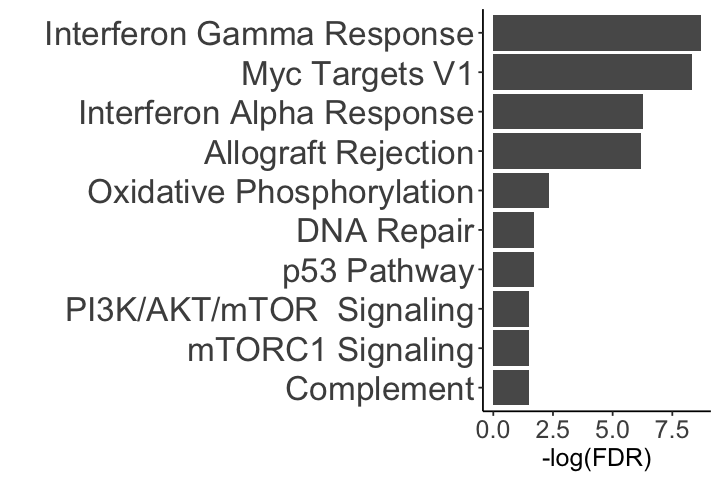

In [22]:
options(repr.plot.width=6, repr.plot.height=4)

# pathway of AS susceptible genes
AS_susceptibility_pathway %>%
  dplyr::filter(`Adjusted P-value` < 0.05) %>%
  dplyr::mutate(logFDR = -log10(`Adjusted P-value`),
                label = ifelse(`Adjusted P-value`<0.001, "***", ifelse(`Adjusted P-value`<0.01, "**", ifelse(`Adjusted P-value`<0.05, "*", "")))) %>%
  ggplot(., aes(x = reorder(x = Term, X = logFDR, FUN = sum), y = logFDR)) + 
  geom_bar(stat = "identity") +
  ylab("-log(FDR)") +
  xlab("") +
  # ggtitle("pathway analysis of AS susceptible genes") +
  coord_flip() +
  theme_classic() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))